<a href="https://colab.research.google.com/github/fathanick/Language-classification/blob/master/Language_classification_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Prepare The Data

In [0]:
import pandas as pd

In [0]:
data = pd.read_excel('/content/drive/My Drive/DTWS #2 WORKSHOP/DATASET/data-klasifikasi-bahasa.xlsx')

In [4]:
data.head()

,Unnamed: 0,cleanText,label
0,0,laporan itu pacar apa satpam,Indo
1,1,marah marah mulu itu pacar apa dosen dosen a...,Indo
2,2,balikan deh yuk you love me i love you teru...,Indo
3,3,nonitrend adalah multivitamin yg terbuat dari ...,Indo
4,4,pacar suka marah dan curiga enaknya diapain ya,Indo


In [9]:
len(data)
data['label'].unique()

array(['Indo', 'Jawa', 'Sunda'], dtype=object)

###Libraries Declaration

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(7)

###Naive Bayes

In [0]:
#Multinomial Naive Bayes
pipeline_mnb = Pipeline([
    ('vect', CountVectorizer()),
    #('vect', CountVectorizer(ngram_range=(2,2))),
    ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
    ('clf', MultinomialNB(alpha=1))
])

X_train, X_test, y_train, y_test = train_test_split(data['cleanText'], data['label'],  test_size=0.33, random_state = 0)
clf_mnb = pipeline_mnb.fit(X_train, y_train)
pred_mnb = pipeline_mnb.predict(X_test)

####Naive Bayes Result

In [27]:
acc_mnb = accuracy_score(y_test, pred_mnb)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, pred_mnb)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, pred_mnb))

Accuracy: 0.9248
Confusion matrix:
 [[39990   564   439]
 [ 3371 28664   447]
 [ 3000   217 30224]]
              precision    recall  f1-score   support

        Indo       0.86      0.98      0.92     40993
        Jawa       0.97      0.88      0.93     32482
       Sunda       0.97      0.90      0.94     33441

    accuracy                           0.92    106916
   macro avg       0.94      0.92      0.93    106916
weighted avg       0.93      0.92      0.93    106916



####Naive Bayes Confusion Matrix

[[39990   564   439]
 [ 3371 28664   447]
 [ 3000   217 30224]]


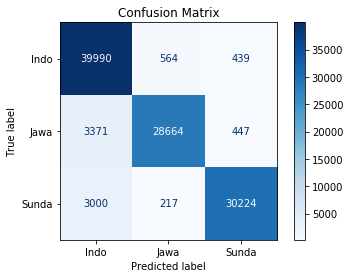

In [28]:
class_names = data['label'].unique()
disp = plot_confusion_matrix(clf_mnb, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

####Prediksi Naive Bayes

In [29]:
predictions = pipeline_mnb.predict(["Kumaha eta teh","Ojo lungo kene wae","saya sangat menyukai kerja anda"])
predictions

array(['Sunda', 'Jawa', 'Indo'], dtype='<U5')

###Support Vector Classifier

In [0]:
#SVC
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
    ('clf', LinearSVC())
])

X_train, X_test, y_train, y_test = train_test_split(data['cleanText'], data['label'],  test_size=0.33, random_state = 0)
clf_svc = pipeline_svc.fit(X_train, y_train)
pred_svc = pipeline_svc.predict(X_test)

####SVC Result

In [32]:
acc_svc = accuracy_score(y_test, pred_svc)
print("Accuracy: {0:.4f}".format(acc_svc))

conf_matrix_svc = confusion_matrix(y_test, pred_svc)
print("Confusion matrix:\n {}".format(conf_matrix_svc))
print(classification_report(y_test, pred_svc))

Accuracy: 0.9579
Confusion matrix:
 [[40074   590   329]
 [ 1706 30476   300]
 [ 1259   316 31866]]
              precision    recall  f1-score   support

        Indo       0.93      0.98      0.95     40993
        Jawa       0.97      0.94      0.95     32482
       Sunda       0.98      0.95      0.97     33441

    accuracy                           0.96    106916
   macro avg       0.96      0.96      0.96    106916
weighted avg       0.96      0.96      0.96    106916



[[40074   590   329]
 [ 1706 30476   300]
 [ 1259   316 31866]]


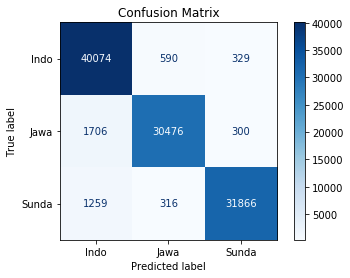

In [33]:
disp = plot_confusion_matrix(clf_svc, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

###References

* https://seaborn.pydata.org/generated/seaborn.heatmap.html